# Import Libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [5]:
df = pd.read_csv('super_shop_dataset.csv')
df

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,Male,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P5995,Groceries,Mobile,LG,Item_C,1945,44,1089.20,95,50,...,Female,New,Mobile Payment,T54995,Completed,14,Returned,321,Night,Average
4996,P5996,Electronics,Mobile,LG,Item_D,1094,26,809.56,176,80,...,Male,Regular,Credit Card,T54996,Cancelled,11,Returned,748,Night,Good
4997,P5997,Electronics,Chairs,Samsung,Item_B,76,25,57.00,22,48,...,Male,VIP,Cash,T54997,Completed,9,Returned,193,Morning,Good
4998,P5998,Electronics,Mobile,Nike,Item_B,2210,5,2099.50,137,97,...,Female,New,Mobile Payment,T54998,Pending,10,Returned,383,Night,Bad


## Check The Data

In [12]:
df.head()

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,Male,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good


In [14]:
df.shape

(5000, 30)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          5000 non-null   object 
 1   Category            5000 non-null   object 
 2   Sub_Category        5000 non-null   object 
 3   Brand               5000 non-null   object 
 4   Product_Name        5000 non-null   object 
 5   Price               5000 non-null   int64  
 6   Discount            5000 non-null   int64  
 7   Final_Price         5000 non-null   float64
 8   Stock               5000 non-null   int64  
 9   Sold_Quantity       5000 non-null   int64  
 10  Rating              5000 non-null   float64
 11  Reviews             5000 non-null   int64  
 12  Supplier            5000 non-null   object 
 13  Purchase_Cost       5000 non-null   int64  
 14  Profit              5000 non-null   float64
 15  Expiry_Date         5000 non-null   object 
 16  Manufa

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,5000.0,2496.502200,1436.775614,50.00,1247.7500,2495.000,3774.0000,4999.0
Discount,5000.0,24.189600,14.293373,0.00,12.0000,24.000,36.0000,49.0
Final_Price,5000.0,1889.533832,1155.905452,30.16,909.7725,1838.585,2729.8675,4999.0
Stock,5000.0,100.823400,57.947495,1.00,51.0000,101.000,152.0000,199.0
Sold_Quantity,5000.0,49.811800,29.067641,0.00,25.0000,50.000,75.0000,99.0
Rating,5000.0,3.009660,1.139949,1.00,2.0000,3.000,4.0000,5.0
Reviews,5000.0,246.230800,144.427846,0.00,119.7500,242.500,370.0000,499.0
Purchase_Cost,5000.0,2009.571600,1146.702806,30.00,1018.7500,2010.000,3014.0000,3999.0
Profit,5000.0,-120.037768,1641.722155,-3934.40,-1295.4425,-157.750,1018.4625,4627.8
Shelf_Number,5000.0,25.148000,14.128567,1.00,13.0000,25.000,37.0000,49.0


In [20]:
df.sample

<bound method NDFrame.sample of      Product_ID     Category Sub_Category    Brand Product_Name  Price  \
0         P1000         Toys       Chairs     Nike       Item_D   2684   
1         P1001     Clothing   Vegetables  Samsung       Item_A   2704   
2         P1002         Toys   Vegetables    Apple       Item_C   3173   
3         P1003    Furniture       Laptop     Sony       Item_D   4320   
4         P1004    Furniture        Shirt  Samsung       Item_B   2557   
...         ...          ...          ...      ...          ...    ...   
4995      P5995    Groceries       Mobile       LG       Item_C   1945   
4996      P5996  Electronics       Mobile       LG       Item_D   1094   
4997      P5997  Electronics       Chairs  Samsung       Item_B     76   
4998      P5998  Electronics       Mobile     Nike       Item_B   2210   
4999      P5999    Furniture   Vegetables     Sony       Item_A   1960   

      Discount  Final_Price  Stock  Sold_Quantity  ...  Customer_Gender  \
0   

In [22]:
df.nunique()

Product_ID            5000
Category                 5
Sub_Category             5
Brand                    5
Product_Name             4
Price                 3123
Discount                50
Final_Price           4874
Stock                  199
Sold_Quantity          100
Rating                  41
Reviews                500
Supplier                 3
Purchase_Cost         2852
Profit                4984
Expiry_Date           5000
Manufacturing_Date    5000
Warehouse_Location       3
Shelf_Number            49
Customer_Age            52
Customer_Gender          2
Customer_Type            3
Payment_Method           3
Transaction_ID        5000
Order_Status             3
Delivery_Time           14
Return_Status            2
Employee_ID            896
Shift                    3
Feedback                 3
dtype: int64

In [24]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

Product_ID            0
Category              0
Sub_Category          0
Brand                 0
Product_Name          0
Price                 0
Discount              0
Final_Price           0
Stock                 0
Sold_Quantity         0
Rating                0
Reviews               0
Supplier              0
Purchase_Cost         0
Profit                0
Expiry_Date           0
Manufacturing_Date    0
Warehouse_Location    0
Shelf_Number          0
Customer_Age          0
Customer_Gender       0
Customer_Type         0
Payment_Method        0
Transaction_ID        0
Order_Status          0
Delivery_Time         0
Return_Status         0
Employee_ID           0
Shift                 0
Feedback              0
dtype: int64

In [28]:
df.describe(include='all')

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
count,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000,5000,5000,5000,5000,5000.000000,5000,5000.000000,5000,5000
unique,5000,5,5,5,4,NaN,NaN,NaN,NaN,NaN,...,2,3,3,5000,3,NaN,2,NaN,3,3
top,P1000,Clothing,Shirt,Samsung,Item_A,NaN,NaN,NaN,NaN,NaN,...,Male,Regular,Credit Card,T50000,Pending,NaN,Returned,NaN,Evening,Average
freq,1,1050,1029,1060,1289,NaN,NaN,NaN,NaN,NaN,...,2516,1750,1737,1,1713,NaN,2537,NaN,1700,1690
mean,NaN,NaN,NaN,NaN,NaN,2496.502200,24.189600,1889.533832,100.823400,49.811800,...,NaN,NaN,NaN,NaN,NaN,7.569000,NaN,545.070800,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1436.775614,14.293373,1155.905452,57.947495,29.067641,...,NaN,NaN,NaN,NaN,NaN,4.016524,NaN,257.155505,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000,30.160000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,100.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1247.750000,12.000000,909.772500,51.000000,25.000000,...,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,326.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2495.000000,24.000000,1838.585000,101.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,540.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3774.000000,36.000000,2729.867500,152.000000,75.000000,...,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,767.000000,NaN,NaN


## Exploratory Data Analysis

In [76]:
date_cols = ['Expiry_Date', 'Manufacturing_Date']

for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f'Converted {col} to datetime')
    except Exception as e:
        print(f'Error converting {col}: {e}')
        

Converted Expiry_Date to datetime
Converted Manufacturing_Date to datetime


In [33]:
categoric_cols = ['Category', 'Sub_Category', 'Brand', 'Product_Name', 'Customer_Gender', 'Customer_Type', 'Payment_Method', 'Order_Status', 'Return_Status', 'Shift', 'Feedback']
numeric_cols = ['Price', 'Final_Price', 'Stock', 'Sold_Quantity', 'Rating', 'Reviews', 'Purchase_Cost', 'Profit', 'Delivery_Time', 'Shelf_Number', 'Customer_Age']

In [35]:
val = {'Category': {'Toys': 0, 'Clothing': 1, 'Furniture': 2, 'Electronics': 3, 'Groceries': 4}, 
       'Sub_Category': {'Chairs': 0, 'Vegetables': 1, 'Laptop': 2, 'Shirt': 3, 'Mobile': 4}, 
       'Brand': {'Nike': 0, 'Samsung': 1, 'Apple': 2, 'Sony': 3, 'LG': 4},
      'Product_Name': {'Item_D': 0, 'Item_A': 1, 'Item_C': 2, 'Item_B': 3},
      'Customer_Gender': {'Male': 0, 'Female': 1},
      'Customer_Type': {'Regular': 0, 'New': 1, 'VIP': 2},
      'Payment_Method': {'Mobile Payment': 0, 'Credit Card': 1, 'Cash': 2},
      'Order_Status': {'Pending': 0, 'Completed': 1, 'Cancelled': 2},
      'Return_Status': {'Not Returned': 0, 'Returned': 1},
      'Shift': {'Morning': 0, 'Evening': 1, 'Night': 2},
      'Feedback': {'Average': 0, 'Good': 1, 'Bad': 2}}
df.replace(val, inplace=True)
df

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,0,0,0,0,2684,23,2066.68,192,21,...,0,0,0,T50000,0,2,0,801,0,0
1,P1001,1,1,1,1,2704,15,2298.40,21,62,...,1,0,1,T50001,1,12,0,173,1,1
2,P1002,0,1,2,2,3173,6,2982.62,66,11,...,0,1,1,T50002,0,7,1,974,1,0
3,P1003,2,2,3,0,4320,26,3196.80,180,9,...,0,2,1,T50003,2,13,0,206,0,1
4,P1004,2,3,1,3,2557,34,1687.62,81,73,...,1,0,0,T50004,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P5995,4,4,4,2,1945,44,1089.20,95,50,...,1,1,0,T54995,1,14,1,321,2,0
4996,P5996,3,4,4,0,1094,26,809.56,176,80,...,0,0,1,T54996,2,11,1,748,2,1
4997,P5997,3,0,1,3,76,25,57.00,22,48,...,0,2,2,T54997,1,9,1,193,0,1
4998,P5998,3,4,0,3,2210,5,2099.50,137,97,...,1,1,0,T54998,0,10,1,383,2,2


### Check Categorical Column Arrays

In [38]:
df['Category'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [40]:
df['Sub_Category'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [42]:
df['Brand'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [44]:
df['Product_Name'].unique()

array([0, 1, 2, 3], dtype=int64)

In [46]:
df['Customer_Gender'].unique()

array([0, 1], dtype=int64)

In [48]:
df['Customer_Type'].unique()

array([0, 1, 2], dtype=int64)

In [50]:
df['Payment_Method'].unique()

array([0, 1, 2], dtype=int64)

In [52]:
df['Order_Status'].unique()

array([0, 1, 2], dtype=int64)

In [54]:
df['Return_Status'].unique()

array([0, 1], dtype=int64)

In [56]:
df['Shift'].unique()

array([0, 1, 2], dtype=int64)

In [58]:
df['Feedback'].unique()

array([0, 1, 2], dtype=int64)

## Visualization

### 1. Distribution Of Numeric Columns

In [62]:
colors = ['#D991AB', '#F280DF', '#394A59', '#75B2BF', '#F2C8C4', '#67687', '#322759', '#F280BF']

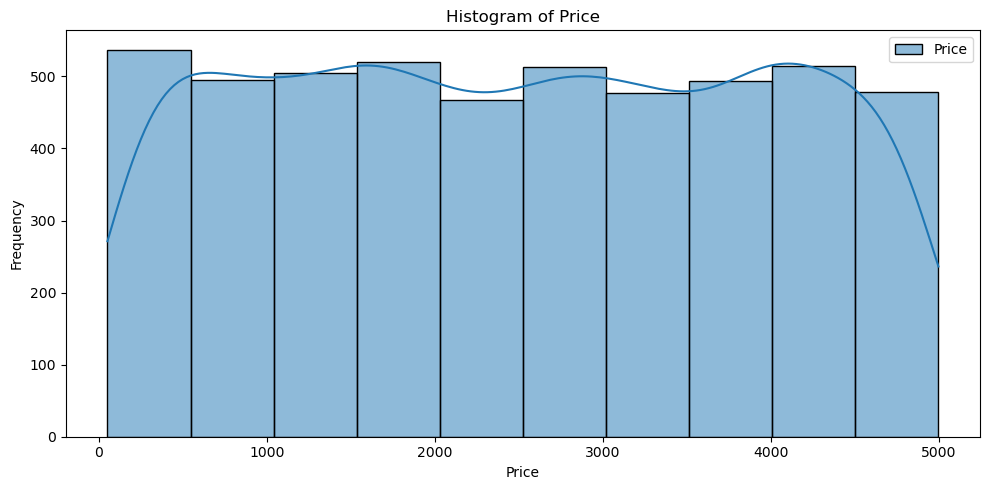

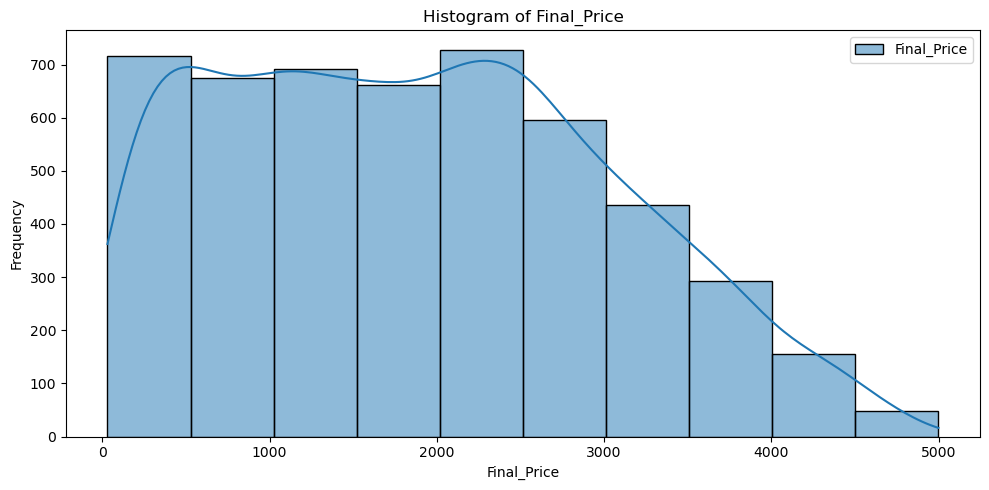

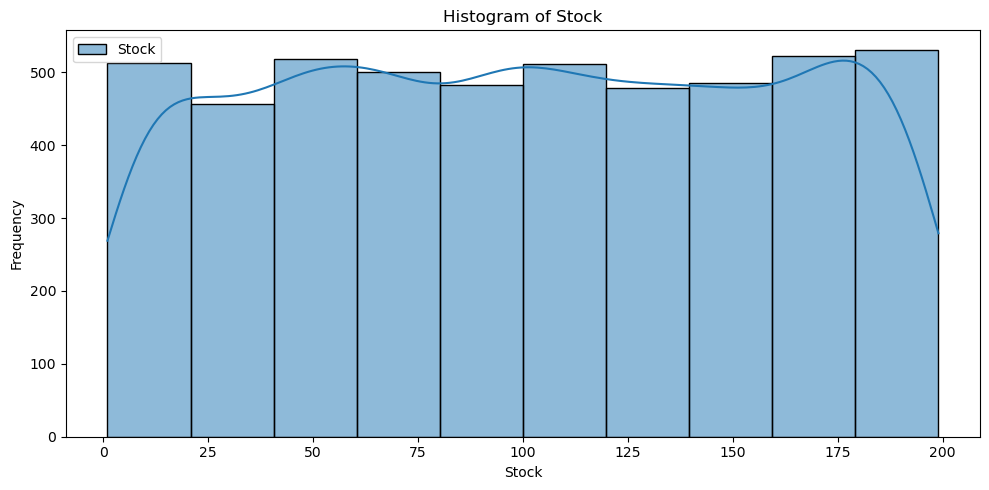

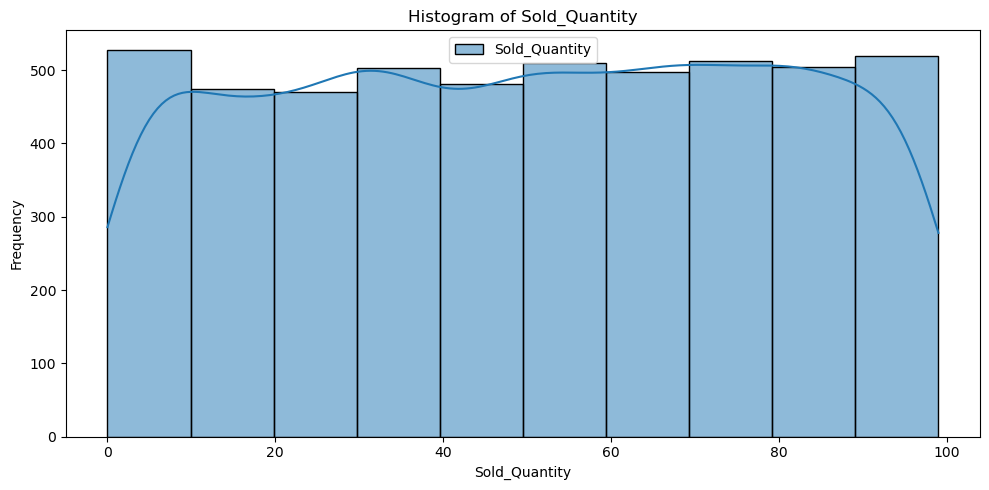

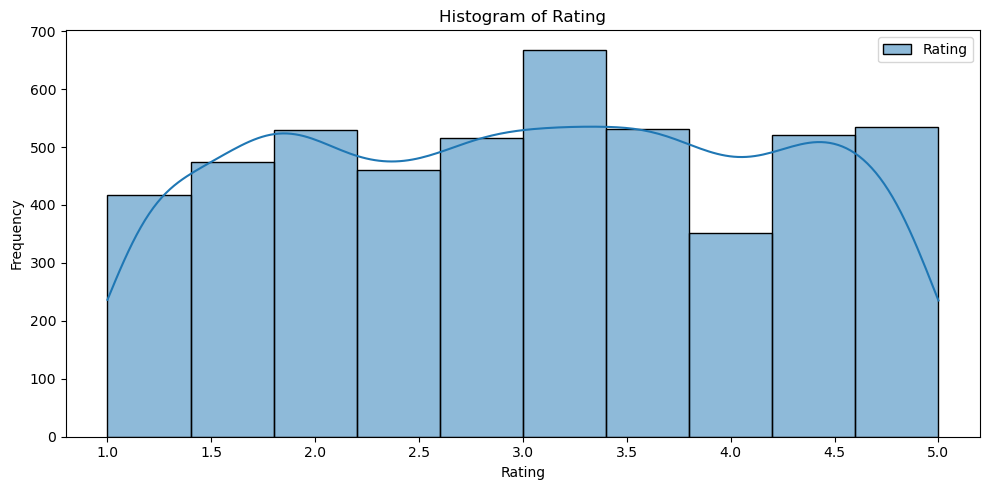

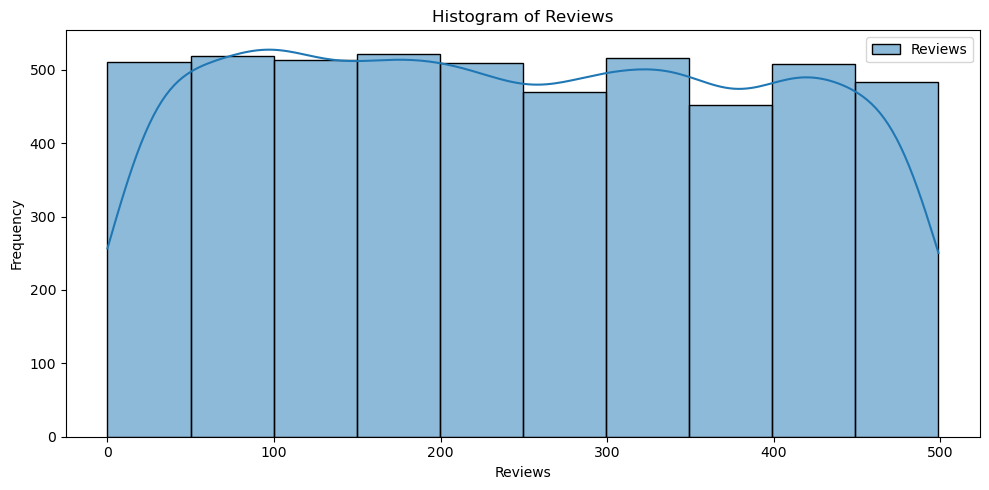

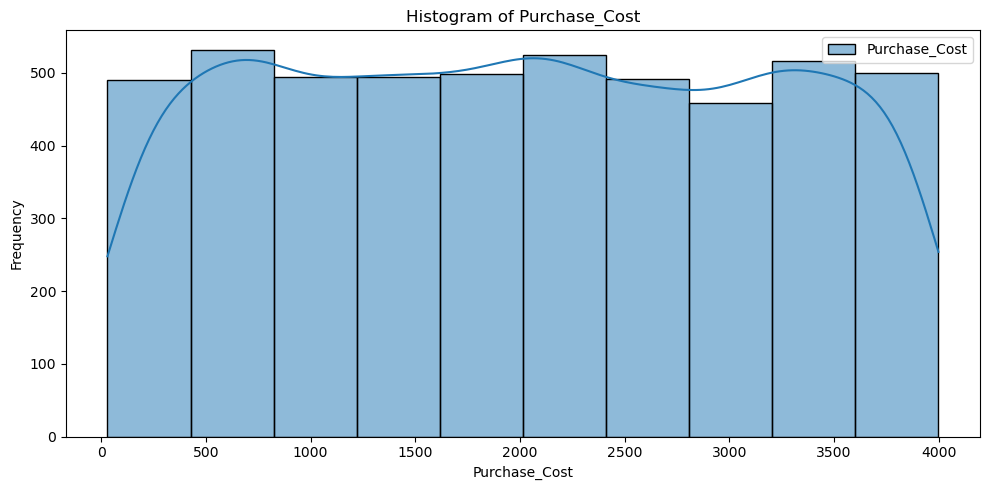

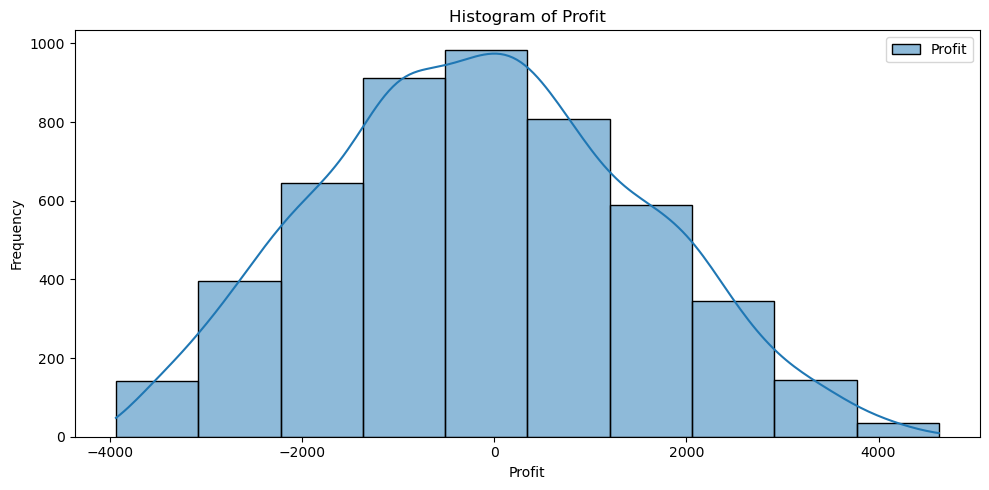

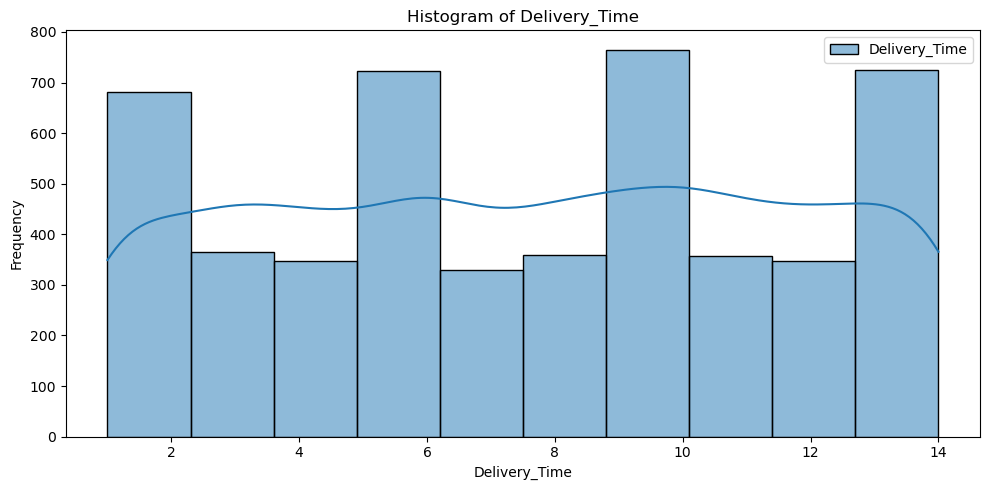

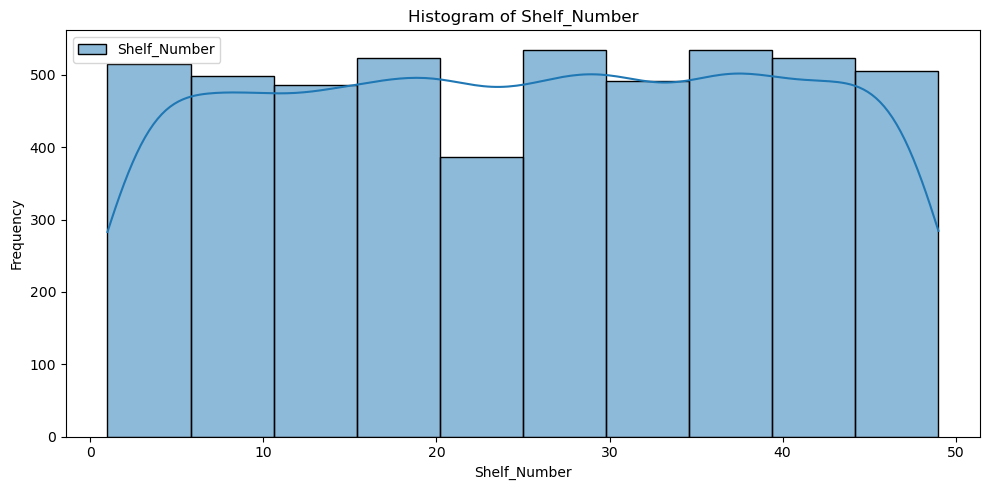

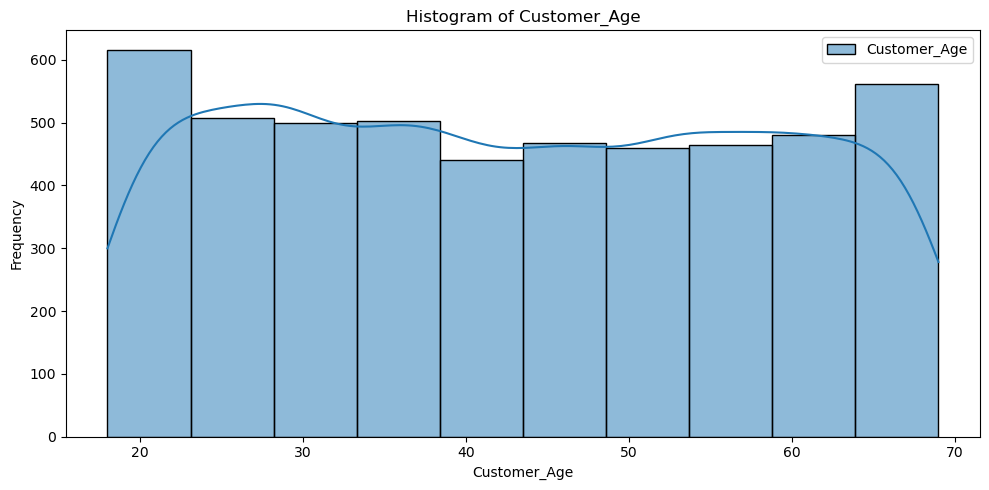

In [60]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, color=colors, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### 2. Plot Categorical Variable: Customer Gender

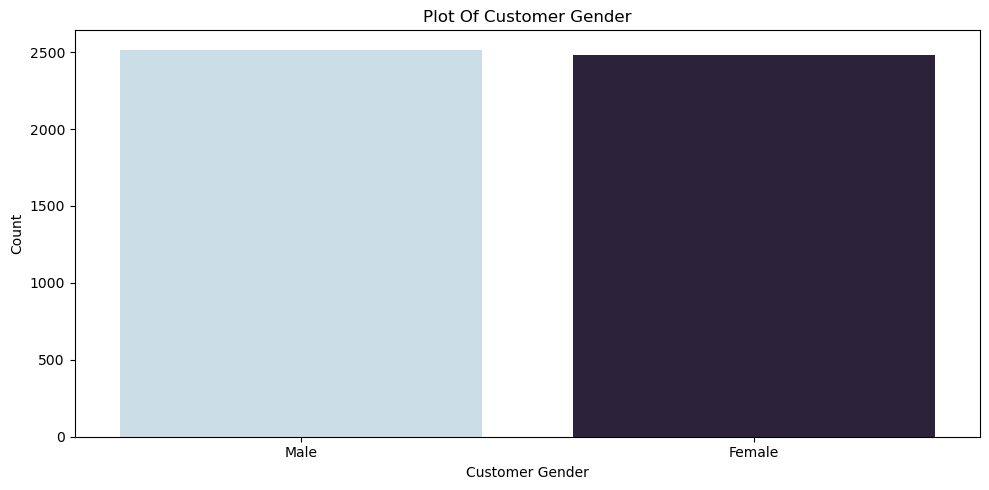

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer_Gender', data=df, palette='ch:s=.25,rot=-.25')
plt.title('Plot Of Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 3. Pie Chart: Sales Distribution by Category

In [72]:
category_sales = df.groupby('Category')['Sold_Quantity'].sum()

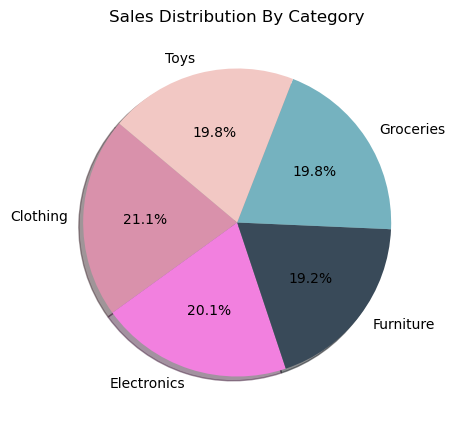

In [74]:
plt.figure(figsize=(10, 5))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Sales Distribution By Category')
plt.show()

### 4. Box Plot: Price Distribution by Category

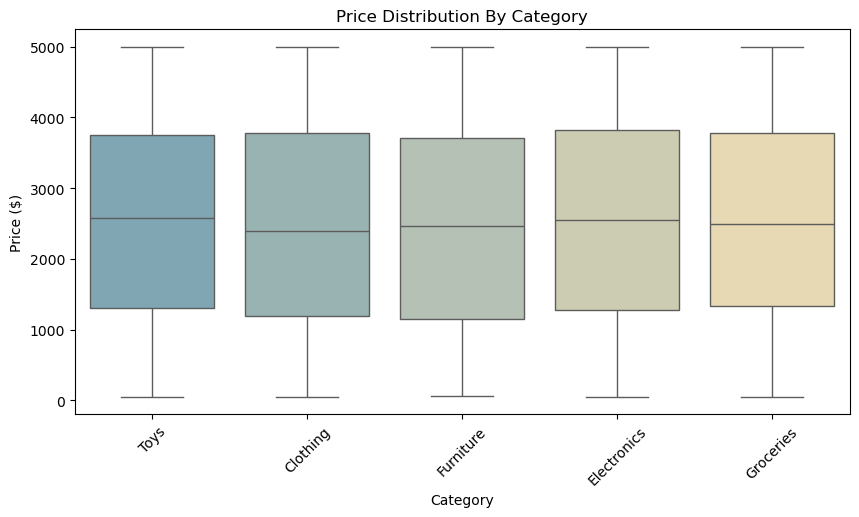

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price', data=df, palette='blend:#7AB,#EDA')
plt.title('Price Distribution By Category')
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

### 5. Violin Plot: Discount Impact On Final Price

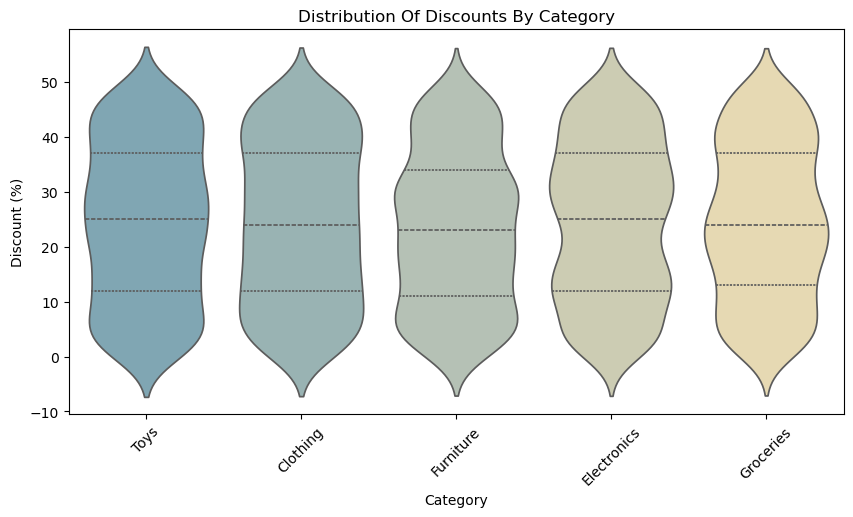

In [88]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Category', y='Discount', data=df, palette='blend:#7AB,#EDA', inner='quartile')
plt.title('Distribution Of Discounts By Category')
plt.xlabel('Category')
plt.ylabel('Discount (%)')
plt.xticks(rotation=45)
plt.show()

### 6. Line Plot: Stock vs Sold Quantity

In [94]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,Male,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P5995,Groceries,Mobile,LG,Item_C,1945,44,1089.20,95,50,...,Female,New,Mobile Payment,T54995,Completed,14,Returned,321,Night,Average
4996,P5996,Electronics,Mobile,LG,Item_D,1094,26,809.56,176,80,...,Male,Regular,Credit Card,T54996,Cancelled,11,Returned,748,Night,Good
4997,P5997,Electronics,Chairs,Samsung,Item_B,76,25,57.00,22,48,...,Male,VIP,Cash,T54997,Completed,9,Returned,193,Morning,Good
4998,P5998,Electronics,Mobile,Nike,Item_B,2210,5,2099.50,137,97,...,Female,New,Mobile Payment,T54998,Pending,10,Returned,383,Night,Bad


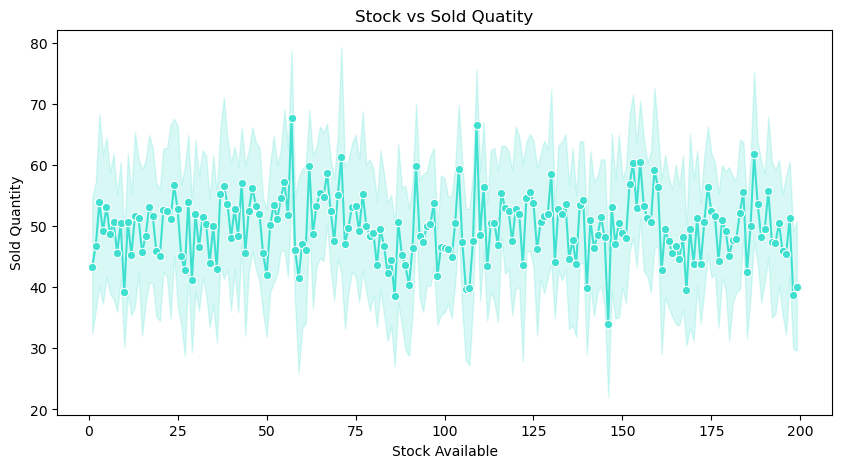

In [111]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Stock'], y=df['Sold_Quantity'], marker='o', color='turquoise')
plt.title('Stock vs Sold Quatity')
plt.xlabel('Stock Available')
plt.ylabel('Sold Quantity')
plt.show()

### 7. Heatmap: Correlation Between Numerical Values

In [68]:
df.drop(['Product_ID'], axis=1, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,0,0,0,T50000,0,2,0,801,0,0
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,1,0,1,T50001,1,12,0,173,1,1
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,0,1,1,T50002,0,7,1,974,1,0
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,0,2,1,T50003,2,13,0,206,0,1
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,1,0,0,T50004,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,1,1,0,T54995,1,14,1,321,2,0
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,0,0,1,T54996,2,11,1,748,2,1
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,0,2,2,T54997,1,9,1,193,0,1
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,1,1,0,T54998,0,10,1,383,2,2


In [70]:
df.drop(['Transaction_ID'], axis=1, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Age,Customer_Gender,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,41,0,0,0,0,2,0,801,0,0
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,32,1,0,1,1,12,0,173,1,1
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,57,0,1,1,0,7,1,974,1,0
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,18,0,2,1,2,13,0,206,0,1
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,57,1,0,0,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,29,1,1,0,1,14,1,321,2,0
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,27,0,0,1,2,11,1,748,2,1
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,59,0,2,2,1,9,1,193,0,1
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,55,1,1,0,0,10,1,383,2,2


In [72]:
df.drop(['Supplier'], axis=1, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Age,Customer_Gender,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,41,0,0,0,0,2,0,801,0,0
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,32,1,0,1,1,12,0,173,1,1
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,57,0,1,1,0,7,1,974,1,0
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,18,0,2,1,2,13,0,206,0,1
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,57,1,0,0,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,29,1,1,0,1,14,1,321,2,0
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,27,0,0,1,2,11,1,748,2,1
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,59,0,2,2,1,9,1,193,0,1
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,55,1,1,0,0,10,1,383,2,2


In [74]:
df.drop(['Warehouse_Location'], axis=1, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Age,Customer_Gender,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,41,0,0,0,0,2,0,801,0,0
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,32,1,0,1,1,12,0,173,1,1
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,57,0,1,1,0,7,1,974,1,0
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,18,0,2,1,2,13,0,206,0,1
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,57,1,0,0,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,29,1,1,0,1,14,1,321,2,0
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,27,0,0,1,2,11,1,748,2,1
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,59,0,2,2,1,9,1,193,0,1
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,55,1,1,0,0,10,1,383,2,2


In [159]:
val = {'Category': {'Toys': 0, 'Clothing': 1, 'Furniture': 2, 'Electronics': 3, 'Groceries': 4}, 
       'Sub_Category': {'Chairs': 0, 'Vegetables': 1, 'Laptop': 2, 'Shirt': 3, 'Mobile': 4}, 
       'Brand': {'Nike': 0, 'Samsung': 1, 'Apple': 2, 'Sony': 3, 'LG': 4},
      'Product_Name': {'Item_D': 0, 'Item_A': 1, 'Item_C': 2, 'Item_B': 3},
      'Customer_Gender': {'Male': 0, 'Female': 1},
      'Customer_Type': {'Regular': 0, 'New': 1, 'VIP': 2},
      'Payment_Method': {'Mobile Payment': 0, 'Credit Card': 1, 'Cash': 2},
      'Order_Status': {'Pending': 0, 'Completed': 1, 'Cancelled': 2},
      'Return_Status': {'Not Returned': 0, 'Returned': 1},
      'Shift': {'Morning': 0, 'Evening': 1, 'Night': 2},
      'Feedback': {'Average': 0, 'Good': 1, 'Bad': 2}}
df.replace(val, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,0,0,0,T50000,0,2,0,801,0,0
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,1,0,1,T50001,1,12,0,173,1,1
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,0,1,1,T50002,0,7,1,974,1,0
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,0,2,1,T50003,2,13,0,206,0,1
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,1,0,0,T50004,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,1,1,0,T54995,1,14,1,321,2,0
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,0,0,1,T54996,2,11,1,748,2,1
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,0,2,2,T54997,1,9,1,193,0,1
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,1,1,0,T54998,0,10,1,383,2,2


In [177]:
num_corr = numeric_cols
correlation = num_corr

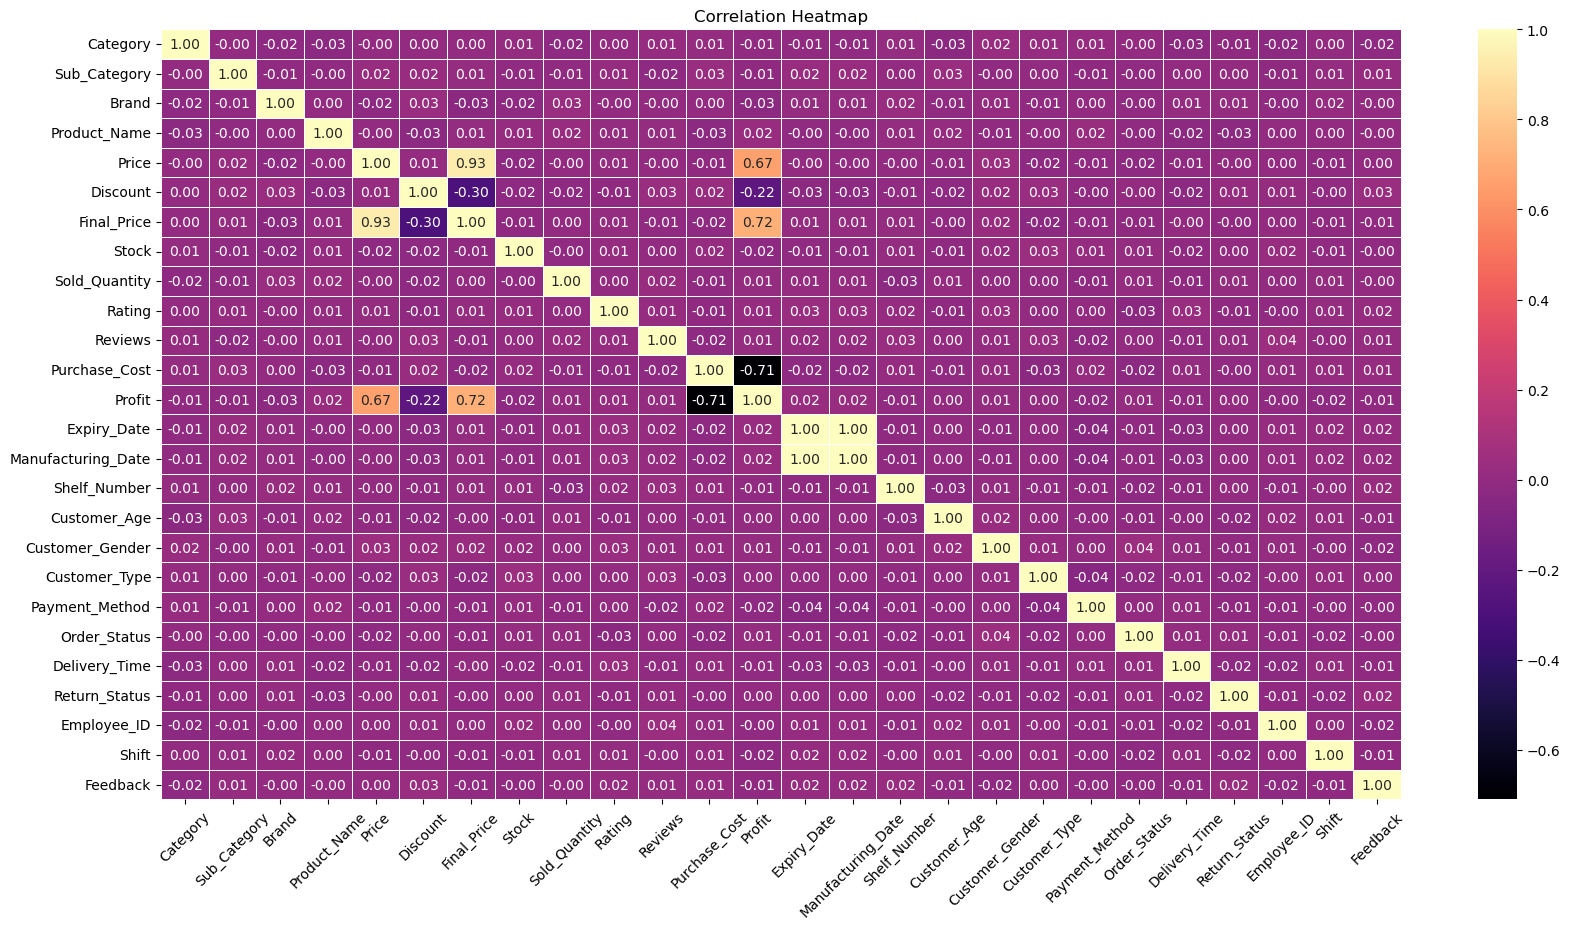

In [185]:
plt.figure(figsize=(20, 10))
sns.heatmap(num_corr, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### 8. Price Variability By Brand

In [200]:
val = {'Brand': {0: 'Nike', 1: 'Samsung', 2: 'Apple', 3: 'Sony', 4: 'LG'}}
df.replace(val, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Age,Customer_Gender,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,Nike,0,2684,23,2066.68,192,21,1.5,...,41,0,0,0,0,2,0,801,0,0
1,1,1,Samsung,1,2704,15,2298.40,21,62,2.6,...,32,1,0,1,1,12,0,173,1,1
2,0,1,Apple,2,3173,6,2982.62,66,11,3.9,...,57,0,1,1,0,7,1,974,1,0
3,2,2,Sony,0,4320,26,3196.80,180,9,4.5,...,18,0,2,1,2,13,0,206,0,1
4,2,3,Samsung,3,2557,34,1687.62,81,73,2.0,...,57,1,0,0,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,LG,2,1945,44,1089.20,95,50,3.7,...,29,1,1,0,1,14,1,321,2,0
4996,3,4,LG,0,1094,26,809.56,176,80,4.9,...,27,0,0,1,2,11,1,748,2,1
4997,3,0,Samsung,3,76,25,57.00,22,48,1.2,...,59,0,2,2,1,9,1,193,0,1
4998,3,4,Nike,3,2210,5,2099.50,137,97,4.8,...,55,1,1,0,0,10,1,383,2,2


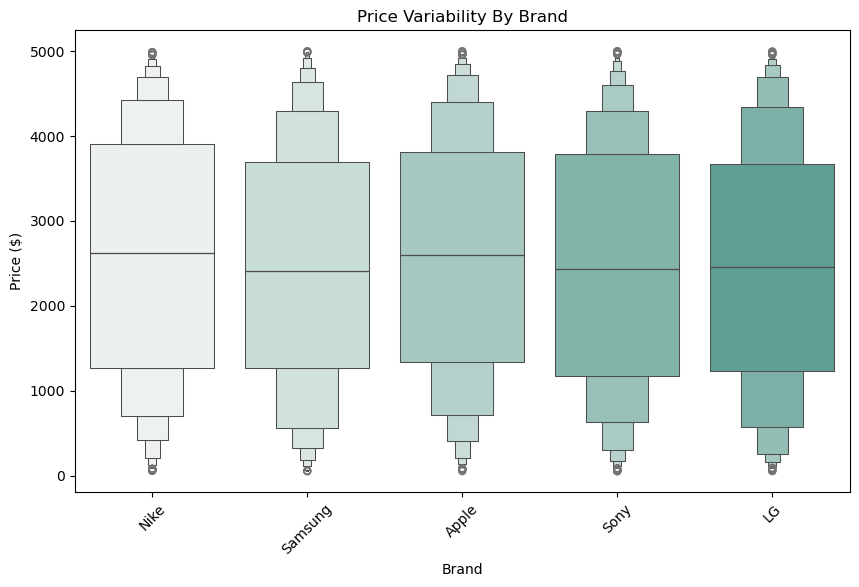

In [202]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Brand', y='Price', data=df, palette='light:#5A9')
plt.title('Price Variability By Brand')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

### 9. Purchase Trends By Customer Type

In [206]:
val = {'Customer_Type': {0: 'Regular', 1: 'New', 2: 'VIP'}}
df.replace(val, inplace=True)
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Age,Customer_Gender,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,0,0,Nike,0,2684,23,2066.68,192,21,1.5,...,41,0,Regular,0,0,2,0,801,0,0
1,1,1,Samsung,1,2704,15,2298.40,21,62,2.6,...,32,1,Regular,1,1,12,0,173,1,1
2,0,1,Apple,2,3173,6,2982.62,66,11,3.9,...,57,0,New,1,0,7,1,974,1,0
3,2,2,Sony,0,4320,26,3196.80,180,9,4.5,...,18,0,VIP,1,2,13,0,206,0,1
4,2,3,Samsung,3,2557,34,1687.62,81,73,2.0,...,57,1,Regular,0,0,11,1,994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,LG,2,1945,44,1089.20,95,50,3.7,...,29,1,New,0,1,14,1,321,2,0
4996,3,4,LG,0,1094,26,809.56,176,80,4.9,...,27,0,Regular,1,2,11,1,748,2,1
4997,3,0,Samsung,3,76,25,57.00,22,48,1.2,...,59,0,VIP,2,1,9,1,193,0,1
4998,3,4,Nike,3,2210,5,2099.50,137,97,4.8,...,55,1,New,0,0,10,1,383,2,2


In [208]:
customer_sales = df.groupby('Customer_Type')['Sold_Quantity'].sum().sort_values()

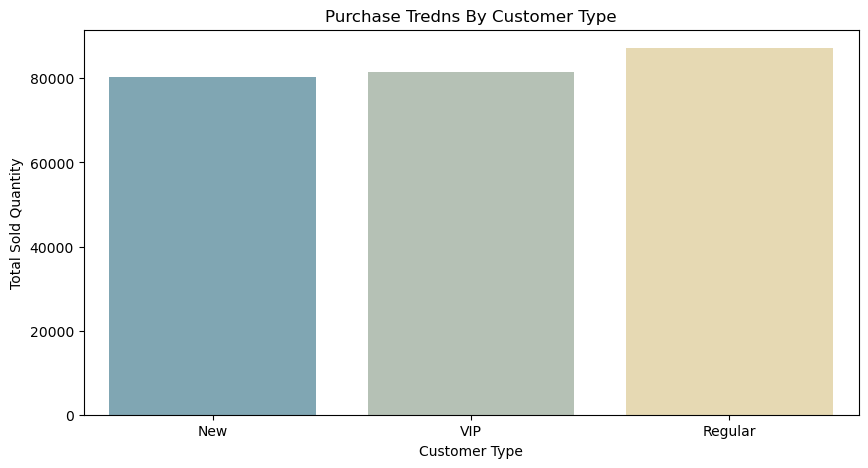

In [210]:
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_sales.index, y=customer_sales.values, palette='blend:#7AB,#EDA')
plt.title('Purchase Tredns By Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sold Quantity')
plt.show()

## Predictive Modeling

### Time Based Features

In [78]:
if 'Manufacturing_Date' in df.columns and 'Expiry_Date' in df.columns:
    df['Shelf_Life'] = (df['Expiry_Date'] - df['Manufacturing_Date']).dt.days

In [82]:
df['Discount_Per'] = (df['Discount'] / df['Price']) * 100
df

,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,Rating,...,Customer_Type,Payment_Method,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback,Shelf_Life,Discount_Per
0,0,0,0,0,2684,23,2066.68,192,21,1.5,...,0,0,0,2,0,801,0,0,366,0.856930
1,1,1,1,1,2704,15,2298.40,21,62,2.6,...,0,1,1,12,0,173,1,1,366,0.554734
2,0,1,2,2,3173,6,2982.62,66,11,3.9,...,1,1,0,7,1,974,1,0,366,0.189095
3,2,2,3,0,4320,26,3196.80,180,9,4.5,...,2,1,2,13,0,206,0,1,366,0.601852
4,2,3,1,3,2557,34,1687.62,81,73,2.0,...,0,0,0,11,1,994,1,1,366,1.329683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,4,4,2,1945,44,1089.20,95,50,3.7,...,1,0,1,14,1,321,2,0,366,2.262211
4996,3,4,4,0,1094,26,809.56,176,80,4.9,...,0,1,2,11,1,748,2,1,366,2.376600
4997,3,0,1,3,76,25,57.00,22,48,1.2,...,2,2,1,9,1,193,0,1,366,32.894737
4998,3,4,0,3,2210,5,2099.50,137,97,4.8,...,1,0,0,10,1,383,2,2,366,0.226244


In [84]:
features = ['Price', 'Final_Price', 'Stock', 'Sold_Quantity', 'Rating', 'Reviews', 'Purchase_Cost', 'Delivery_Time', 'Shelf_Number', 'Customer_Age', 'Discount_Per']
model_df = df[features + ['Profit']].dropna()

In [86]:
X = model_df[features]
y = model_df['Profit']

### 1. Train Test Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4000, 11) (1000, 11)


### 2. Linear Regression Model

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [103]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R2 Score: 1.0000
RMSE: 0.0000


### 3. Permutation Importance

In [107]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

feature_importance = pd.Series(perm_importance.importances_mean, index=features).sort_values()

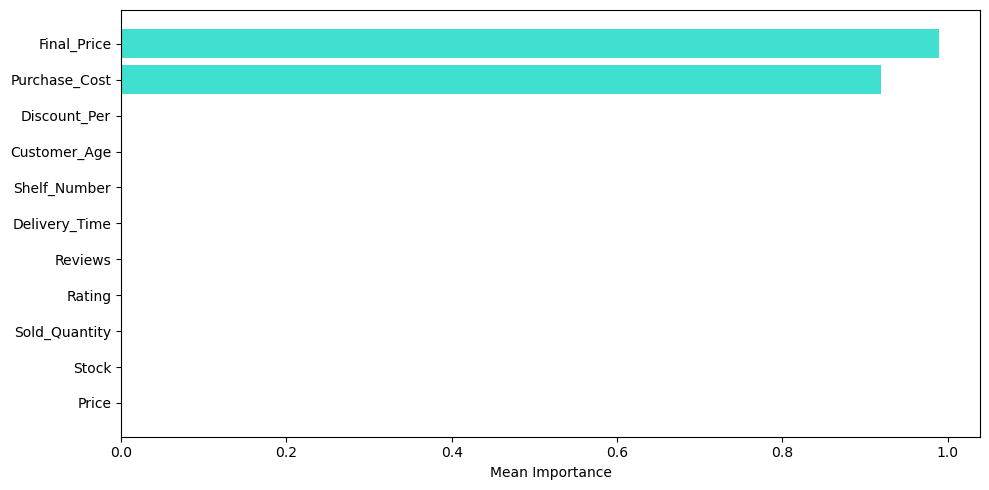

In [115]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance.index, feature_importance.values, color='turquoise')
plt.xlabel('Mean Importance')
plt.tight_layout()
plt.show()